In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data Loading


In [12]:
data = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [ ]:
device = torch.device

In [13]:
data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
batch_size = 1000
train_loader = DataLoader(data, batch_size=batch_size, shuffle=True)

In [15]:
train_img = next(iter(train_loader))[0]
train_label = next(iter(train_loader))[1]

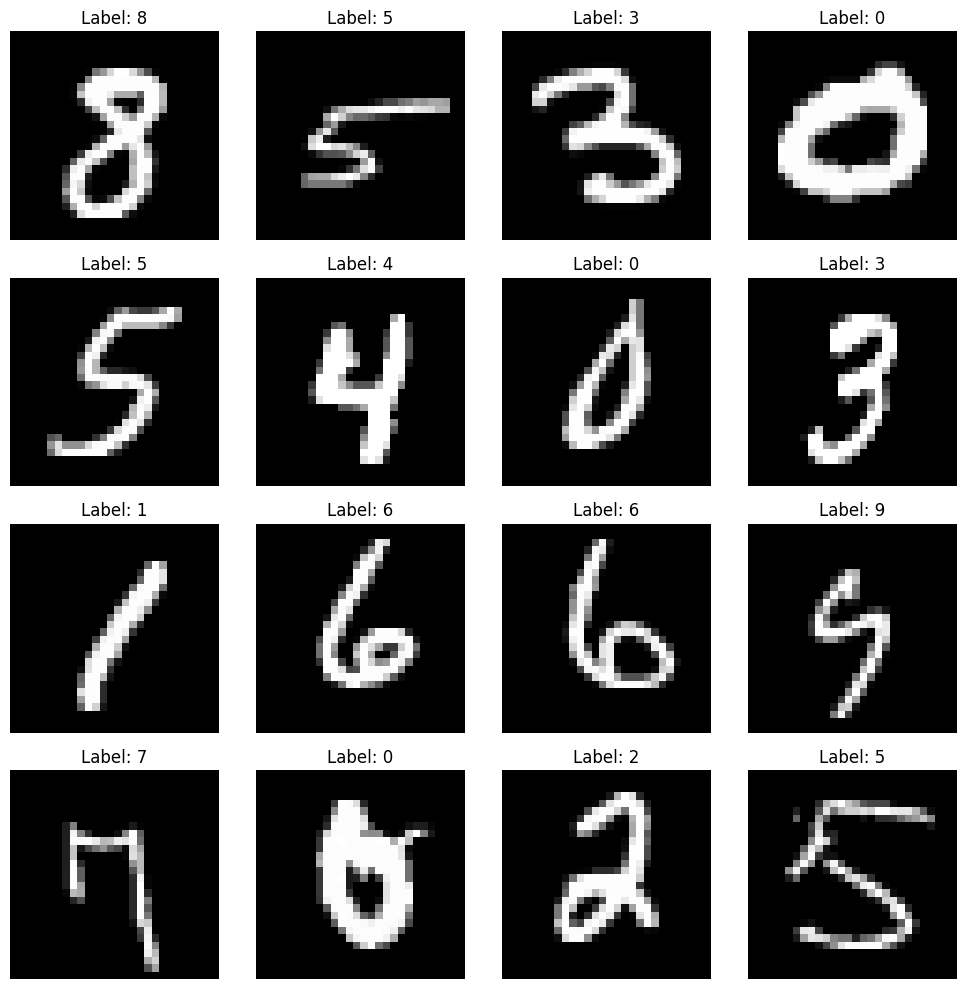

In [16]:


# Display a grid of images
def show_grid(loader):
    images, labels = next(iter(loader))
    grid_size = min(batch_size, 16)  # Show at most 16 images
    plt.figure(figsize=(10, 10))
    for i in range(grid_size):
        plt.subplot(4, 4, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_grid(train_loader)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(train_img, train_label, test_size=0.2, random_state=42)

In [18]:
# Encoder -> Gaussian Noise -> latent space -> Decoder
class AE(nn.Module):
    def __init__(self):
        super(AE,self.__init__())
        self.encoder = nn.Sequential(
            nn.Conv2d(28*28, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 28*28, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        compressed = self.encoder(x)
        decompressed = self.decoder(compressed)
        decompressed = torch.abs(decompressed)
        return decompressed


In [ ]:
model = AE()
loss = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=1e-3)

In [ ]:
loss_set1 = []
epochs = 100
for epoch in range(epochs):
  for batch in train_loader:

    batch = batch[0]

    batch = batch / 255.0
    compressed = model(batch)
    loss = loss(compressed, batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  if epoch % 10 == 0:
    loss_set1.append(loss.item())